In [6]:
import pandas as pd

In [7]:
user = pd.read_csv('./BX-Users.csv')
rating = pd.read_csv('./BX-Book-Ratings.csv')
book = pd.read_csv('./BX-Books.csv')

In [8]:
user.head()

,User-ID,Location,Age
0,183,"porto, porto, portugal",27.0
1,242,"neuffen, baden-wuerttemberg, germany",37.0
2,254,"minneapolis, minnesota, usa",24.0
3,388,"nashville, tennessee, usa",35.0
4,392,"barcelona, catalunya, spain",44.0


In [9]:
# dataframe 정보
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5157 entries, 0 to 5156
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User-ID   5157 non-null   int64  
 1   Location  5157 non-null   object 
 2   Age       5157 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 121.0+ KB


- 5157명 분의 정보
- USER-ID, Location, Age 열

<AxesSubplot:>

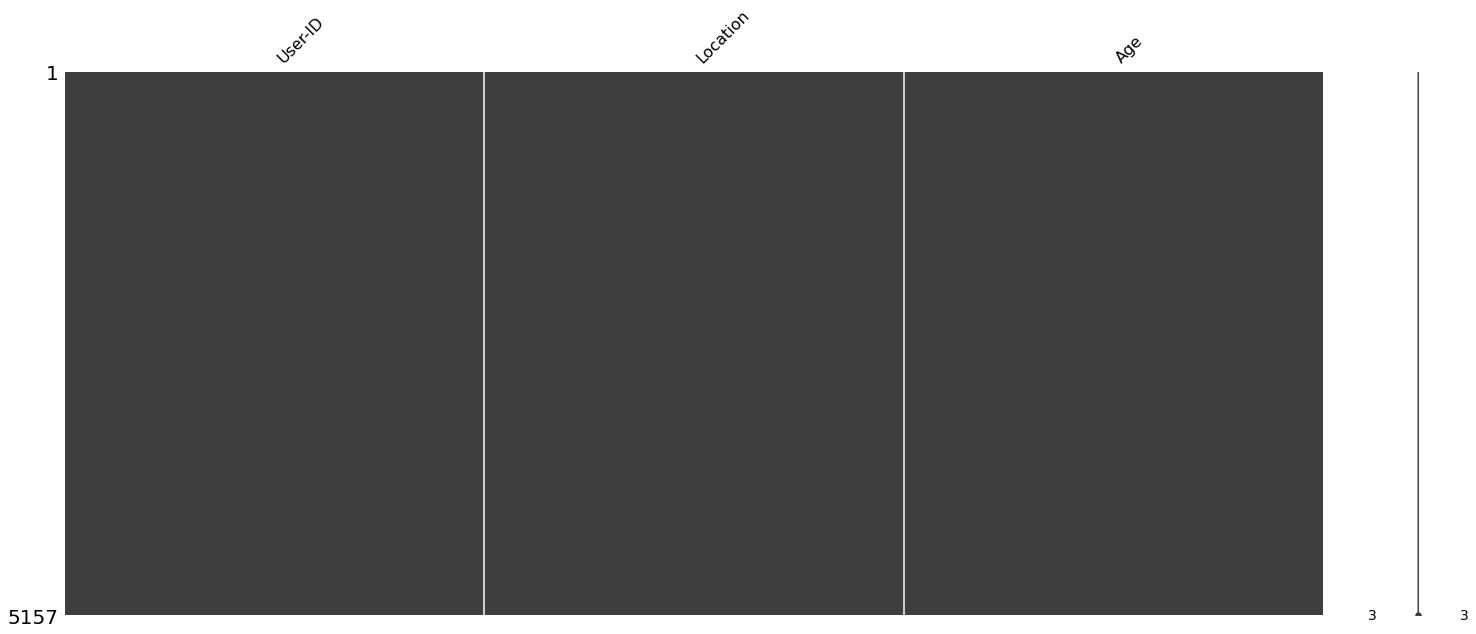

In [10]:
# 결측치 확인
import missingno as msno
msno.matrix(user)

In [11]:
user.isnull().any()

User-ID     False
Location    False
Age         False
dtype: bool

- 결측치 없음이 확인됨

In [12]:
# Location 정보
user.Location.head()

0                  porto, porto, portugal
1    neuffen, baden-wuerttemberg, germany
2             minneapolis, minnesota, usa
3               nashville, tennessee, usa
4             barcelona, catalunya, spain
Name: Location, dtype: object

In [13]:
for i in user.Location.values:
    i = i.replace(' ', '') # 쉼표 뒤의 공백을 지움.
    if len(i.split(',')) != 3:
        print(i.split(','))

['coalville', 'leicestershire', 'england', 'unitedkingdom']
['st.l?normandy', 'france']
['gav?barcelona(catalunya)', 'spain']
['belfort', 'franche-comt?france']
['tharston', 'norwich', 'england', 'unitedkingdom']
['wichita', '', 'kansas', 'usa']
['ermington', 's.devon', 'england', 'unitedkingdom']
['redmond', 'or', 'oregon', 'usa']
['hauppauge', 'longisland', 'newyork', 'usa']
['chicago', 'il', 'illinois', 'usa']
['m?ico', 'd.f.', 'disritofederal', 'mexico']
['rub?barcelona', 'spain']
['?m?ano', 'santacruzdetenerife', 'canaryislands', 'spain']
['besan?n', 'franche-comt?france']
['preston', 'lancashire', 'england', 'unitedkingdom']
['merrick', 'acworth', 'newyork', 'georgia', 'usa']
['matar?barcelona', 'spain']
['ramsey', 'huntingdon', 'cambridgeshire', 'unitedkingdom']
['lons-le-saunier', 'franche-comt?france']
['barboursville', '', 'virginia', 'usa']
['burnaby', 'bc', 'britishcolumbia', 'canada']
['gav?barcelona', 'spain']
['valencia', 'pa?valenci?spain']
['belfort', 'franche-comt?fra

- 대부분 도시, 지방, 국가 의 형태로 나누어져 있음.
- 그러나 도시, 지방1, 지방2, 국가 의 형태로 나누어져 있는 경우도 존재하며,
- 지방, 국가의 형태로 나누어져 있는 경우도 존재함.
- 또한 이름이 명확하게 기재되지 않은 경우도 존재함. (besan?n, jyv?kyl?keski-suomi 처럼)
- 따라서 일단은 국가명만 가져온다.

In [14]:
# Location 나누기
nation = []
for i in user.Location.values:
    i = i.replace(' ', '') # 쉼표 뒤의 공백을 지움.
    nation.append(i.split(',')[-1])

In [15]:
# Location에 국가명 할당
user.Location = nation

In [16]:
sorted(user.Location.unique())

['',
 'andorra',
 'argentina',
 'australia',
 'austria',
 'belgium',
 'brazil',
 'bulgaria',
 'burma',
 'canada',
 'catalonia',
 'catalunya',
 'chile',
 'china',
 'costarica',
 'czechrepublic',
 'denmark',
 'dominicanrepublic',
 'england',
 'euskalherria',
 'faraway...',
 'finland',
 'france',
 'franche-comt?france',
 'galiza',
 'germany',
 'guatemala',
 'hereandthere',
 'hongkong',
 'hungary',
 'india',
 'iran',
 'ireland',
 'italy',
 'japan',
 'kuwait',
 'luxembourg',
 'madagascar',
 'malaysia',
 'mexico',
 'netherlands',
 'newzealand',
 'norway',
 'orense',
 'pa?valenci?spain',
 'panama',
 'papuanewguinea',
 'philippines',
 'phillipines',
 'poland',
 'portugal',
 'qatar',
 'romania',
 'singapore',
 'southafrica',
 'spain',
 'sweden',
 'switzerland',
 'taiwan',
 'trinidadandtobago',
 'turkey',
 'u.s.a.',
 'unitedkingdom',
 'unitedstate',
 'unitedstates',
 'usa']

- '' : 공백으로 들어간 국가명도 존재. -> unknown
- 'faraway...', 'hereandthere' -> unknown
- usa, u.s.a, unitedstates 등 같은 국가이지만 다르게 적혀있는 경우를 모두 통합해줘야함.
- 또한 catlunya처럼 국가명이 아니라 지방명이 들어간 경우도 존재함.
- 그리고 franche-comt?france 처럼 잘못되어 있는 국가명도 있음.

In [17]:
# unknown 처리해주어야 할 값들
user.Location = user.Location.replace(['', 'faraway...', 'hereandthere'], ['unknown', 'unknown', 'unknown'])

# 지방명 -> 국가명
user.Location = user.Location.replace(['euskalherria', 'galiza', 'orense', 'catalonia', 'catalunya'], ['spain', 'spain', 'spain', 'spain', 'spain'])

# 잘못된 국가명 -> 올바른 국가명
user.Location = user.Location.replace(['franche-comt?france', 'pa?valenci?spain', 'phillipines'], ['france', 'spain', 'philippines'])
user.Location = user.Location.replace(['u.s.a.', 'unitedstate', 'unitedstates'], ['usa', 'usa', 'usa']) # 미국
user.Location = user.Location.replace(['england'],['unitedkingdom'])

In [18]:
user.Location.unique()

array(['portugal', 'germany', 'usa', 'spain', 'france', 'austria',
       'unitedkingdom', 'malaysia', 'taiwan', 'canada', 'iran', 'italy',
       'switzerland', 'romania', 'finland', 'philippines', 'australia',
       'india', 'qatar', 'japan', 'denmark', 'ireland', 'andorra',
       'belgium', 'unknown', 'chile', 'brazil', 'netherlands',
       'papuanewguinea', 'newzealand', 'argentina', 'mexico', 'sweden',
       'china', 'hongkong', 'burma', 'hungary', 'singapore', 'poland',
       'southafrica', 'kuwait', 'dominicanrepublic', 'panama', 'norway',
       'turkey', 'costarica', 'bulgaria', 'guatemala', 'madagascar',
       'czechrepublic', 'trinidadandtobago', 'luxembourg'], dtype=object)

In [19]:
user.Location.nunique()

52

- user들은 총 52개의 국가에 걸쳐 존재하는 것으로 나타남.

In [20]:
sorted(user.Location.unique())

['andorra',
 'argentina',
 'australia',
 'austria',
 'belgium',
 'brazil',
 'bulgaria',
 'burma',
 'canada',
 'chile',
 'china',
 'costarica',
 'czechrepublic',
 'denmark',
 'dominicanrepublic',
 'finland',
 'france',
 'germany',
 'guatemala',
 'hongkong',
 'hungary',
 'india',
 'iran',
 'ireland',
 'italy',
 'japan',
 'kuwait',
 'luxembourg',
 'madagascar',
 'malaysia',
 'mexico',
 'netherlands',
 'newzealand',
 'norway',
 'panama',
 'papuanewguinea',
 'philippines',
 'poland',
 'portugal',
 'qatar',
 'romania',
 'singapore',
 'southafrica',
 'spain',
 'sweden',
 'switzerland',
 'taiwan',
 'trinidadandtobago',
 'turkey',
 'unitedkingdom',
 'unknown',
 'usa']

In [21]:
user.Location.value_counts().sort_values(ascending=False).values

array([2717,  681,  397,  368,  212,  198,  107,   94,   68,   49,   46,
         41,   35,   14,   14,   11,    9,    9,    8,    7,    6,    6,
          5,    5,    5,    5,    3,    3,    3,    2,    2,    2,    2,
          2,    2,    2,    2,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1], dtype=int64)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, 

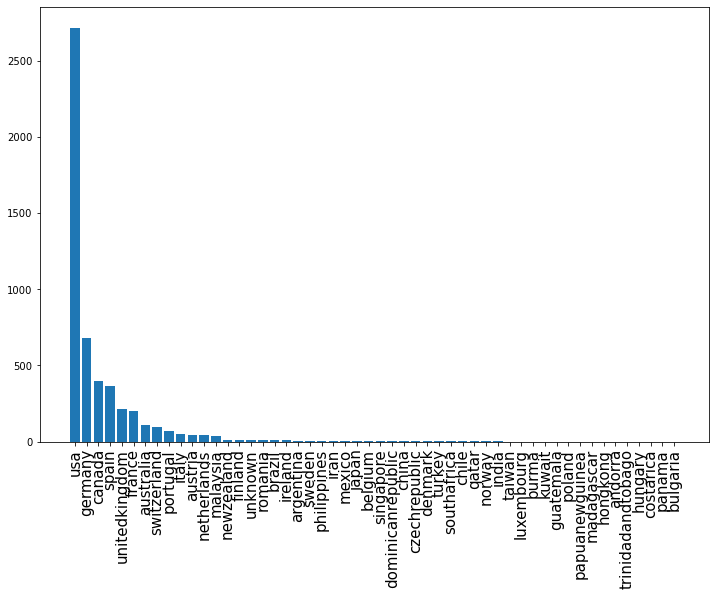

In [22]:
# plot해서 국가별 사용자 수 나타내보기
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.bar(x=user.Location.value_counts().sort_values(ascending=False).index,\
        height=user.Location.value_counts().sort_values(ascending=False).values)
plt.xticks(rotation=90, size=15)

- usa user가 압도적으로 많은 것을 확인 가능.

In [23]:
# Age 열의 기본 정보
user.Age.describe()

count    5157.000000
mean       34.983324
std        13.848990
min         0.000000
25%        26.000000
50%        33.000000
75%        41.000000
max       244.000000
Name: Age, dtype: float64

- 평균 34.9세, 표준편차 13.8세
- max 값이 244세인 것으로 봐서는 이상치 존재함을 알 수 있음

C:\Users\gommg\anaconda3\envs\basic\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

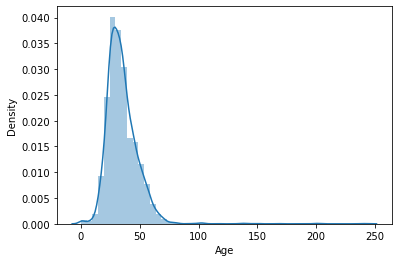

In [24]:
# distplot
import seaborn as sns
sns.distplot(user.Age)

- right-skewed 되어 있음을 볼 수 있다.
- 이상치가 존재하여 전반적으로 그래프가 왼쪽으로 치우침.

In [25]:
# 100세가 넘는 사람의 수?
user[user.Age >= 100].reset_index(drop=True)

,User-ID,Location,Age
0,8782,canada,239.0
1,13273,usa,201.0
2,20688,spain,104.0
3,20857,germany,244.0
4,71800,usa,136.0
5,76482,usa,103.0
6,90766,burma,136.0
7,96714,spain,141.0
8,101668,germany,151.0
9,119282,usa,168.0


- 100세 이상을 이상치라고 한다면, 19명의 이상치가 확인됨.
- 이들의 정보를 없애지 말고, 이들을 제외한 나이의 평균-표준편차 ~ 평균+표준편차의 사이값 중 랜덤한 하나의 값으로 대체.

In [26]:
new_user = user[user.Age<100]
user_mean = new_user.Age.mean()
user_std = new_user.Age.std()

In [27]:
import random
user.loc[user.Age >= 100, 'Age'] = random.randint(int(user_mean-user_std), int(user_mean+user_std))

C:\Users\gommg\anaconda3\envs\basic\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

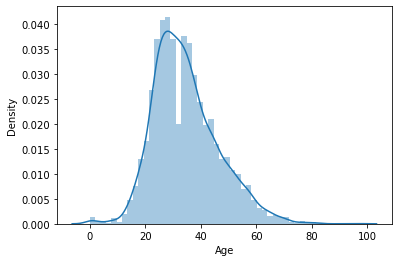

In [28]:
# 다시 plot
sns.distplot(user.Age)

In [29]:
user

,User-ID,Location,Age
0,183,portugal,27.0
1,242,germany,37.0
2,254,usa,24.0
3,388,usa,35.0
4,392,spain,44.0
...,...,...,...
5152,278356,usa,57.0
5153,278563,austria,37.0
5154,278668,spain,48.0
5155,278843,usa,28.0


In [30]:
book.Publisher.value_counts().head(10)

Goldmann       760
Gallimard      640
Harlequin      600
Heyne          588
Mira           501
Pocket         489
L?쩌bbe         445
LGF            419
Rowohlt Tb.    398
Silhouette     345
Name: Publisher, dtype: int64

In [31]:
user.to_csv('./user_pre.csv')